In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

C:\Users\HP\AppData\Local\Temp\ipykernel_6628\3850008948.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df1 = pd.read_csv("weatherHistory.csv")
df1.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Let's Clean the data.

In [3]:
df1.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Checking for null values

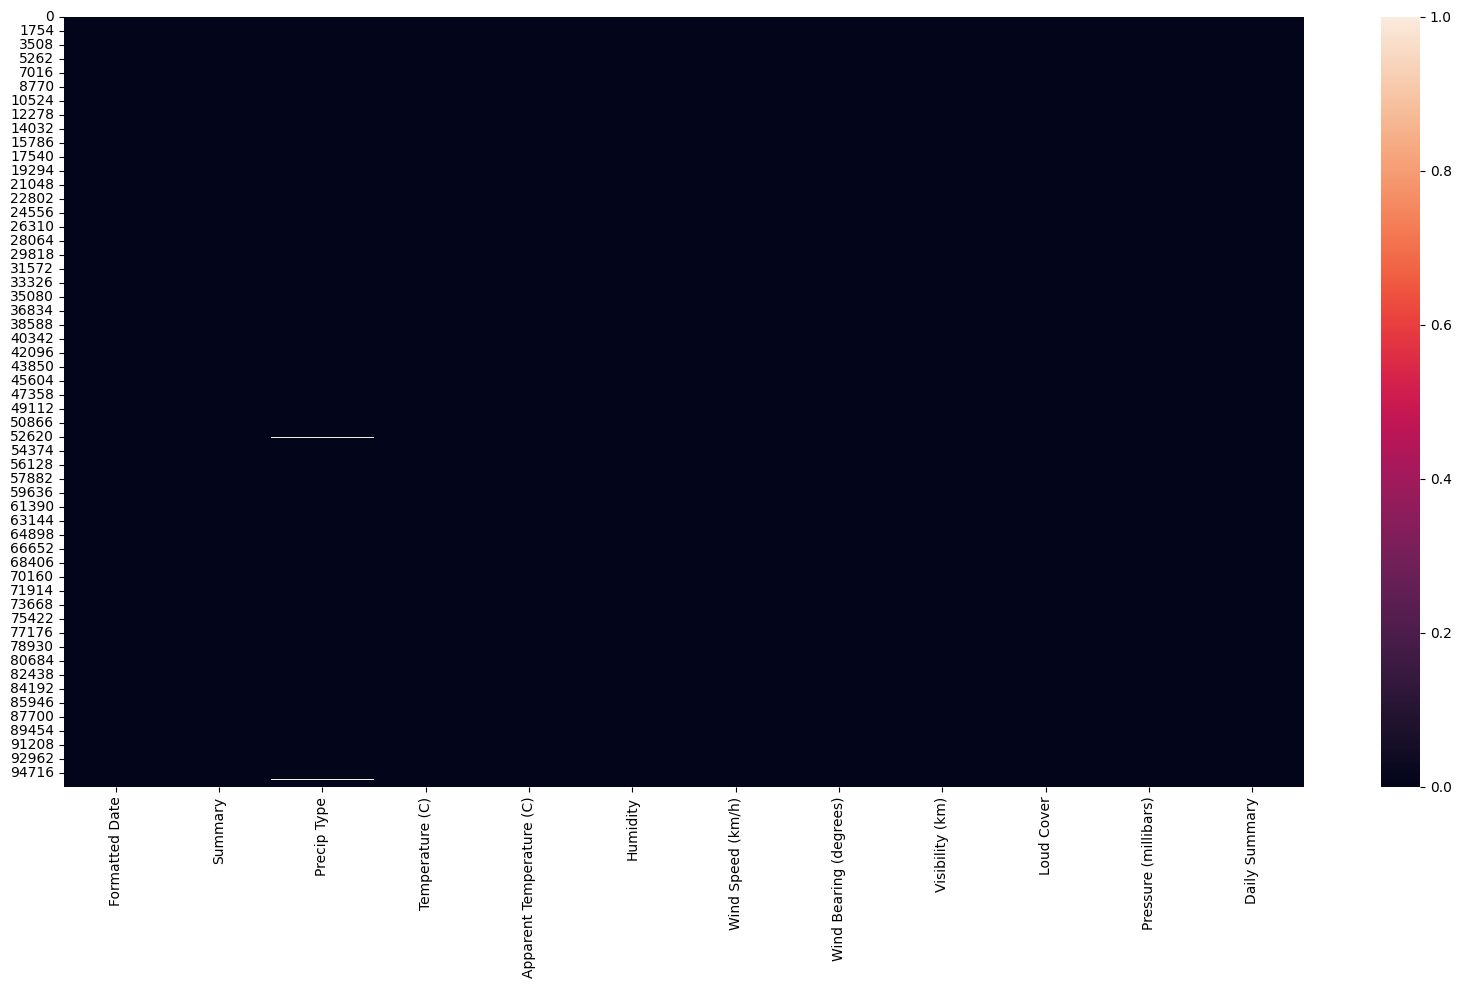

In [4]:
sns.heatmap(df1.isnull())
plt.show()

In [5]:
null_values = df1.isnull().sum()
null_values_percent = (df1.isnull().sum() / df1.shape[0]) * 100
missing_values = pd.concat([null_values, null_values_percent], axis = 1, keys = ['Total', 'percent'])
missing_values

,Total,percent
Formatted Date,0,0.000000
Summary,0,0.000000
Precip Type,517,0.536012
Temperature (C),0,0.000000
Apparent Temperature (C),0,0.000000
Humidity,0,0.000000
Wind Speed (km/h),0,0.000000
Wind Bearing (degrees),0,0.000000
Visibility (km),0,0.000000
Loud Cover,0,0.000000


We found null values only in Precip type column. As, there are only 0.53% rows having null values so dropping these columns would be a safe option.

In [6]:
df2 = df1.dropna()
null_values = df2.isnull().sum()
null_values_percent = (df2.isnull().sum() / df2.shape[0]) * 100
missing_values = pd.concat([null_values, null_values_percent], axis = 1, keys = ['Total', 'percent'])
missing_values

,Total,percent
Formatted Date,0,0.0
Summary,0,0.0
Precip Type,0,0.0
Temperature (C),0,0.0
Apparent Temperature (C),0,0.0
Humidity,0,0.0
Wind Speed (km/h),0,0.0
Wind Bearing (degrees),0,0.0
Visibility (km),0,0.0
Loud Cover,0,0.0


In [7]:
df2.shape

(95936, 12)

In [8]:
# We can drop Loud Cover column since it does not contain any information.
df3 = df2.drop(['Loud Cover'], axis = 1)
df3.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [9]:
# Let's move to Formatted date.
print(df3["Formatted Date"].unique())

['2006-04-01 00:00:00.000 +0200' '2006-04-01 01:00:00.000 +0200'
 '2006-04-01 02:00:00.000 +0200' ... '2016-09-09 21:00:00.000 +0200'
 '2016-09-09 22:00:00.000 +0200' '2016-09-09 23:00:00.000 +0200']


It can be guessed that it is only the month and the time of the day that plays its part in detecting the weather. Let's split the data to make month and time column.

In [10]:
df4 = df3.copy()
def get_date_time(x):
    splitted_date = x.split(' ')
    month = splitted_date[0].split('-')[1]
    time = splitted_date[1].split(':')[0]
    return time, month

In [11]:
df4['time'] = df4['Formatted Date'].apply(get_date_time)
df4.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,time
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,"(00, 04)"
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,"(01, 04)"
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,"(02, 04)"
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,"(03, 04)"
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,"(04, 04)"


In [12]:
df4.shape
df4.isnull().sum()
df5 = df4.drop(['Formatted Date'], axis=1)
df5.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,time
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,"(00, 04)"
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,"(01, 04)"
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,"(02, 04)"
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,"(03, 04)"
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,"(04, 04)"


In [13]:
# Going to Summary column
df5['Summary'].unique()
# Total Length : 27
Summary_Stats = df5.groupby('Summary')['Summary'].agg('count').sort_values(ascending = False)
Summary_Stats

Summary
Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [14]:
# Putting all the values having occurence less than or equal to 10 in 'other' category
occurence_less_than_10 = Summary_Stats[Summary_Stats<=10]
df5.Summary = df5.Summary.apply(lambda x :'other' if x in occurence_less_than_10 else x)
df5.groupby('Summary')['Summary'].agg('count').sort_values(ascending = False)
# We'll apply One-hot Encoding on this column later.

Summary
Partly Cloudy               31635
Mostly Cloudy               27914
Overcast                    16516
Clear                       10763
Foggy                        7117
Breezy and Overcast           528
Breezy and Mostly Cloudy      516
Breezy and Partly Cloudy      386
Dry and Partly Cloudy          86
Windy and Partly Cloudy        67
Light Rain                     63
Breezy                         54
Windy and Overcast             45
Humid and Mostly Cloudy        40
Drizzle                        39
Breezy and Foggy               35
Windy and Mostly Cloudy        35
Dry                            34
other                          32
Humid and Partly Cloudy        17
Dry and Mostly Cloudy          14
Name: Summary, dtype: int64

In [15]:
# Dropping the "Daily Summary" column since it provides the same data as Summary column
df6 = df5.drop(['Daily Summary'], axis=1)
df6.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),time
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,"(00, 04)"
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,"(01, 04)"
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,"(02, 04)"
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,"(03, 04)"
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,"(04, 04)"


In [16]:
# Moving on to Precip type
df6['Precip Type'].unique()
df6.groupby('Precip Type')['Precip Type'].agg('count').sort_values(ascending = False)
# We can apply one-hot encoding later on these columns.

Precip Type
rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [17]:
# Let's check other columns for outliers.
df6.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


<Axes: >

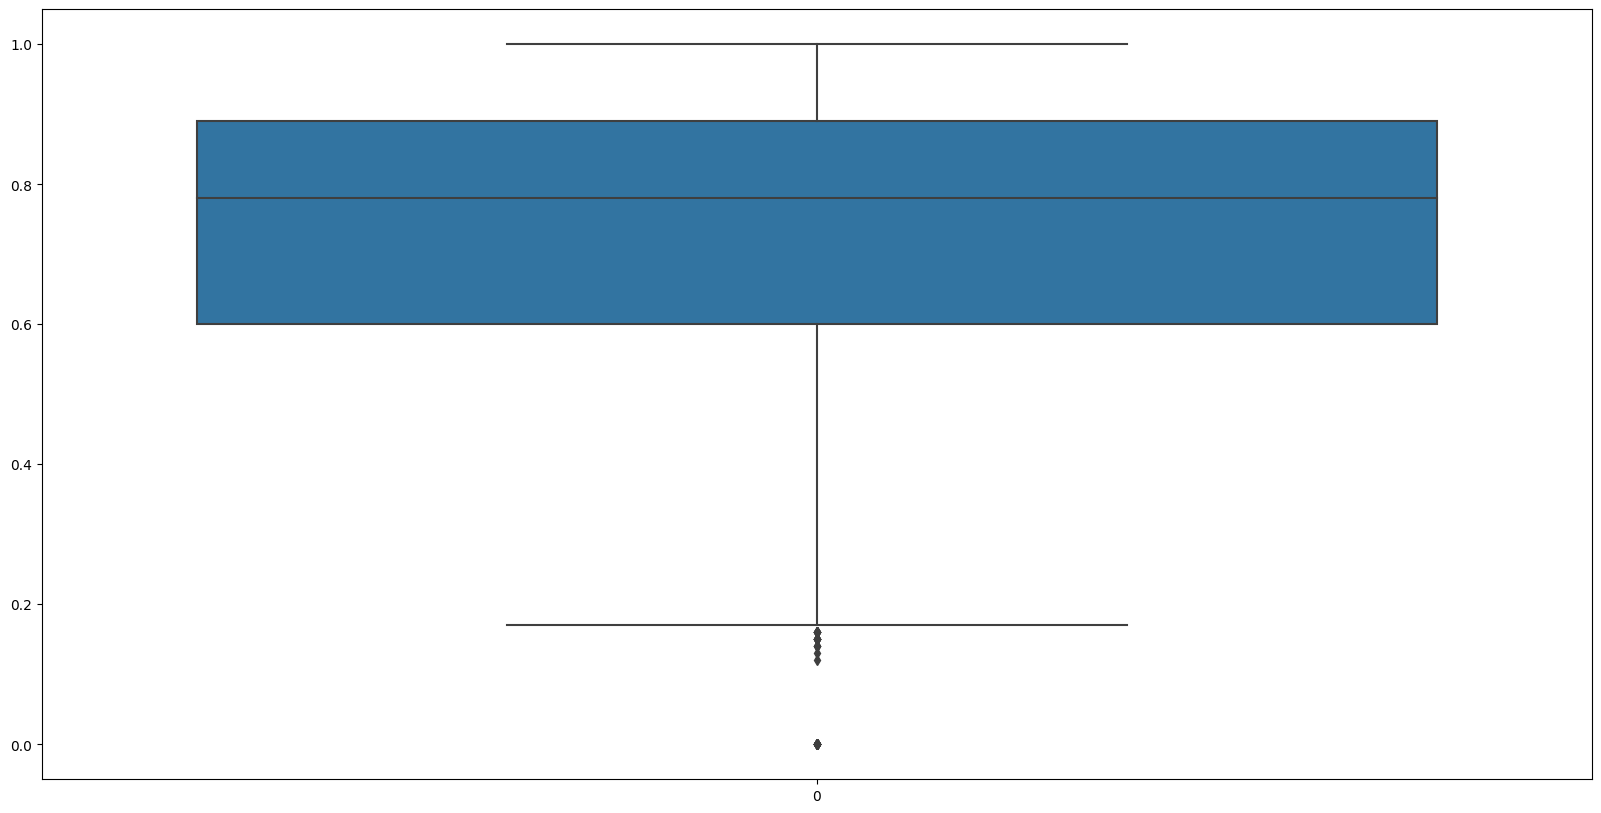

In [18]:
# Box Plot
import seaborn as sns
sns.boxplot(df6['Humidity'])

In [19]:
df6.dtypes

Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
time                         object
dtype: object

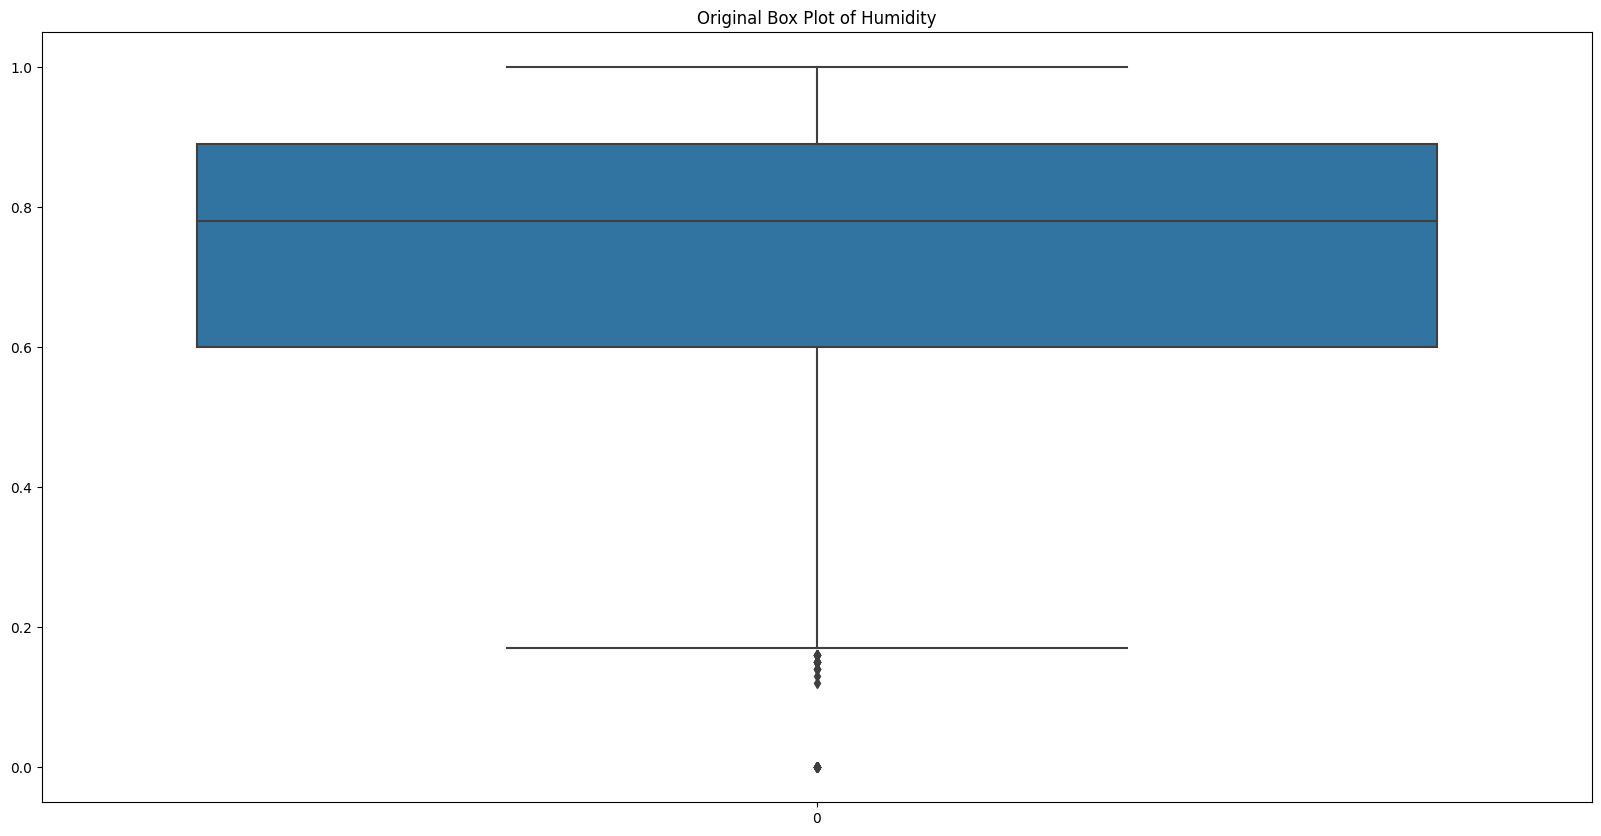

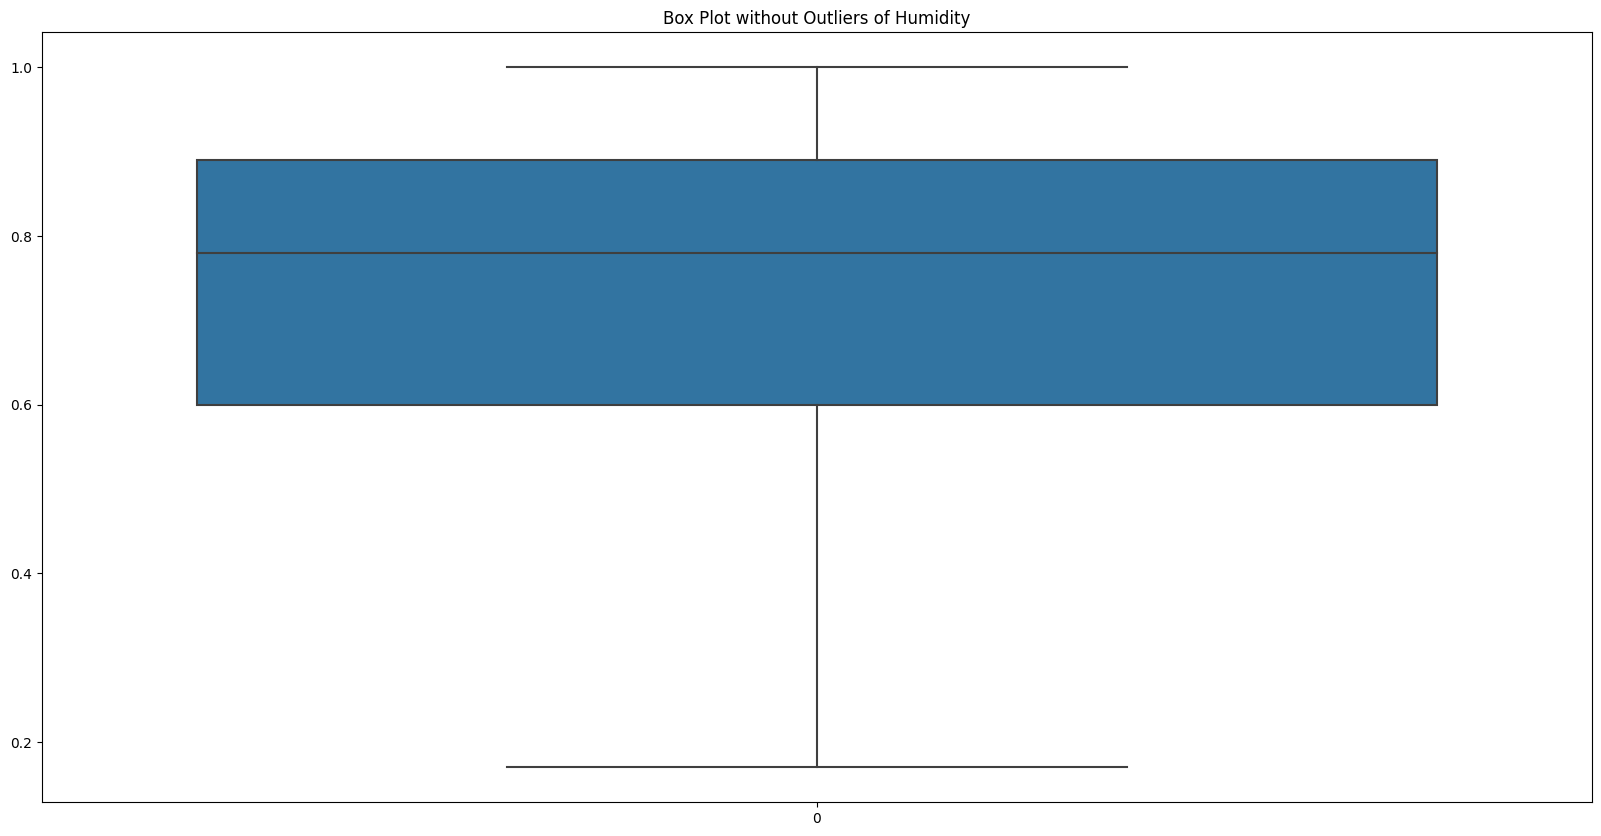

In [20]:
# Removing outliers in Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km), Pressure (millibars) using box plot
import seaborn as sns
import matplotlib.pyplot as plt

df7 = df6.copy()
def removal_box_plot(df, column):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
    
    Q1 = df6[column].quantile(0.25)
    Q3 = df6[column].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    threshold_value_lower = Q1 - (1.5*IQR)
    threshold_value_greater = Q3 + (1.5*IQR)

    removed_outliers = df[df[column] > threshold_value_lower]
    removed_outliers = removed_outliers[removed_outliers[column] < threshold_value_greater]
    
#     plt.subplot(1,2,2)
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers

# columns = ["Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"]
df7 = removal_box_plot(df7, "Humidity")


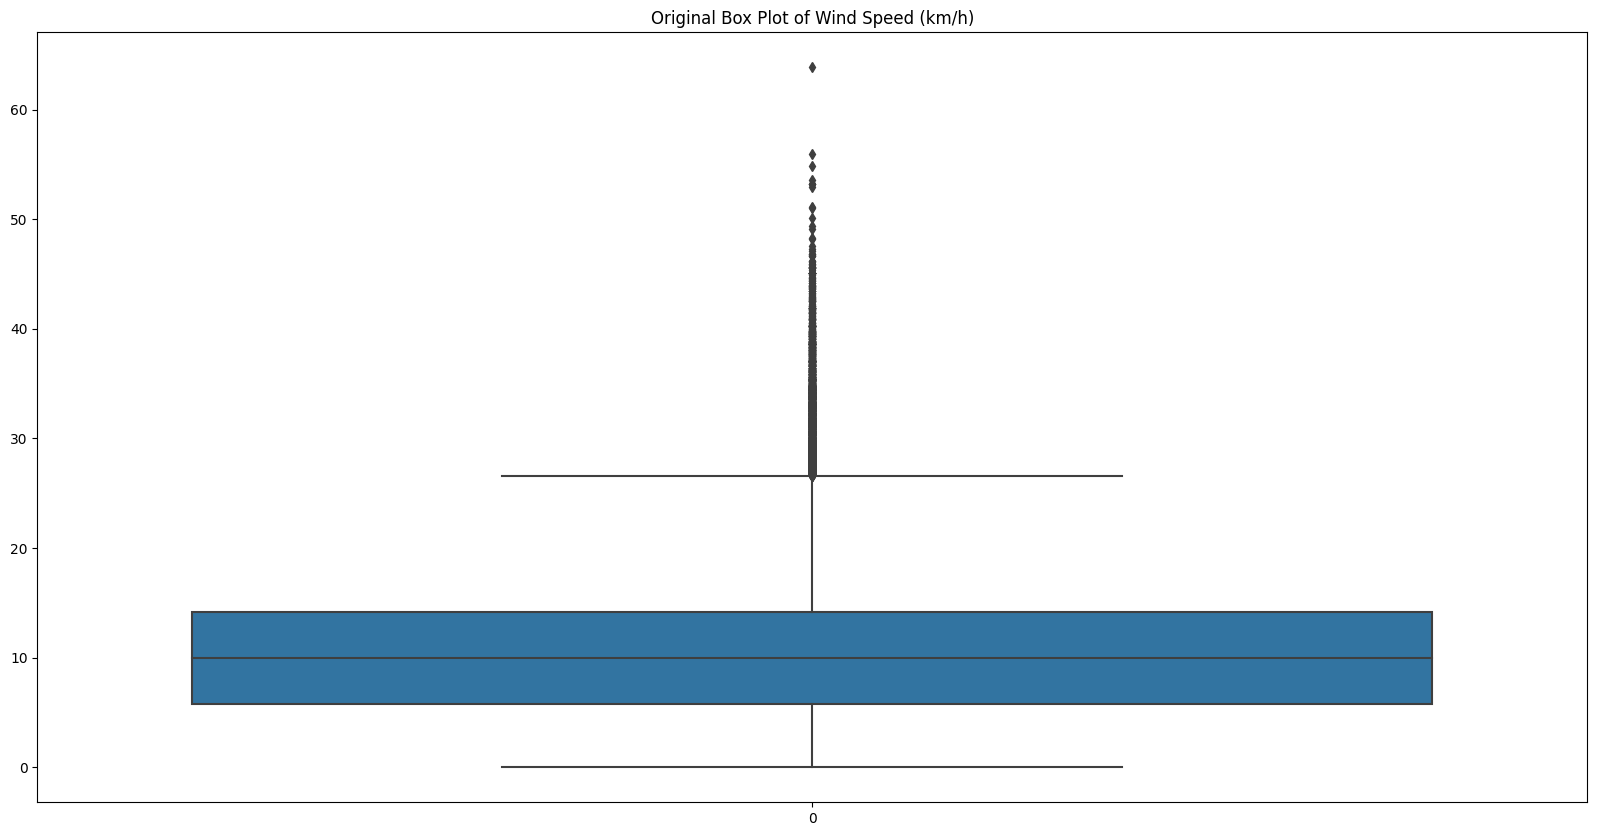

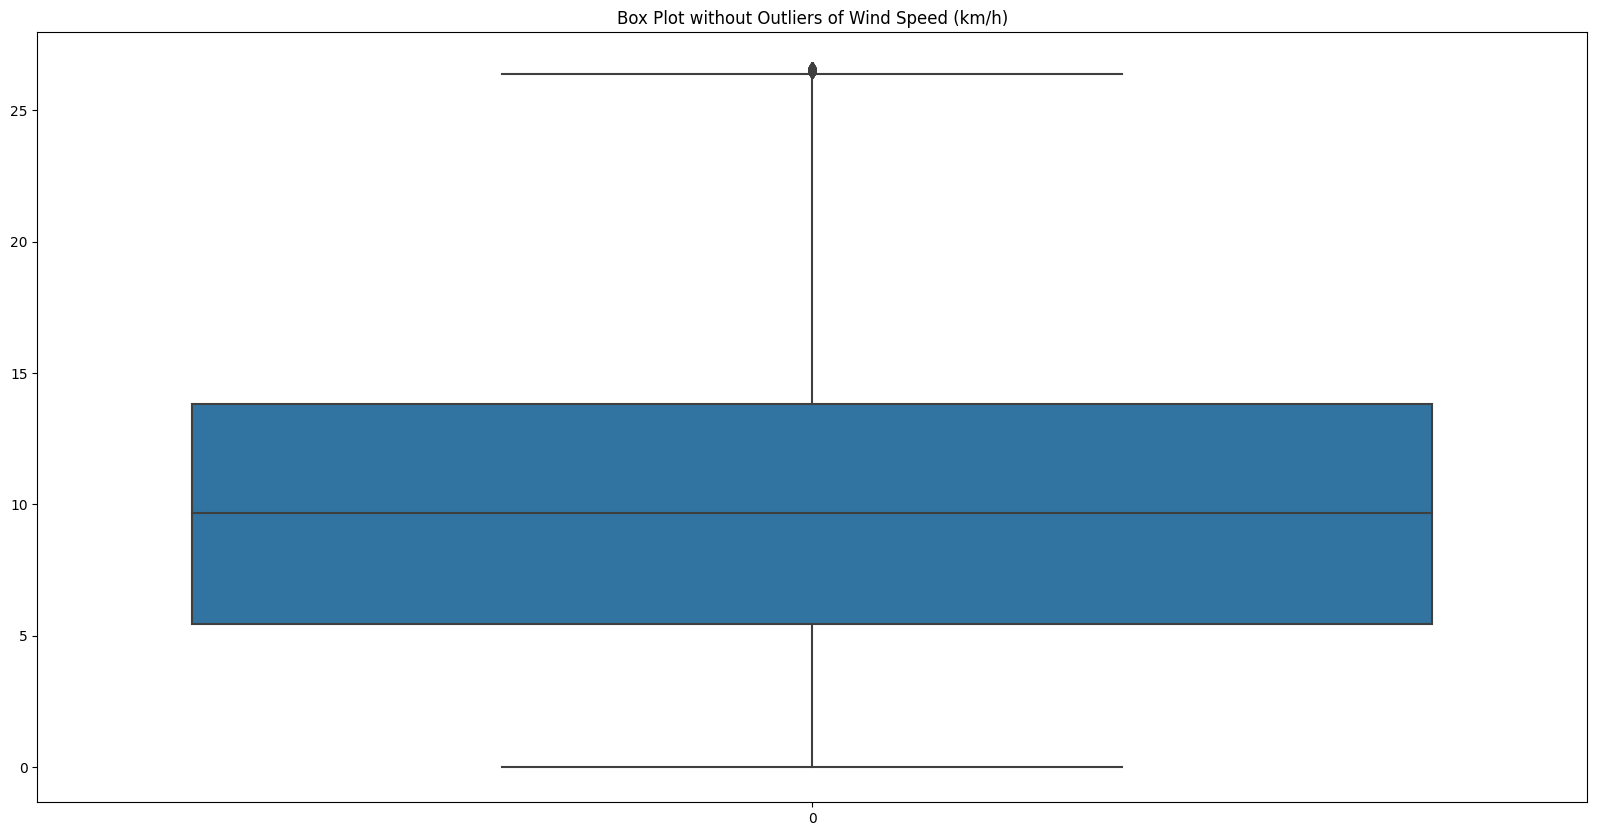

In [21]:
# columns = ["Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"]
df7 = removal_box_plot(df7, "Wind Speed (km/h)")

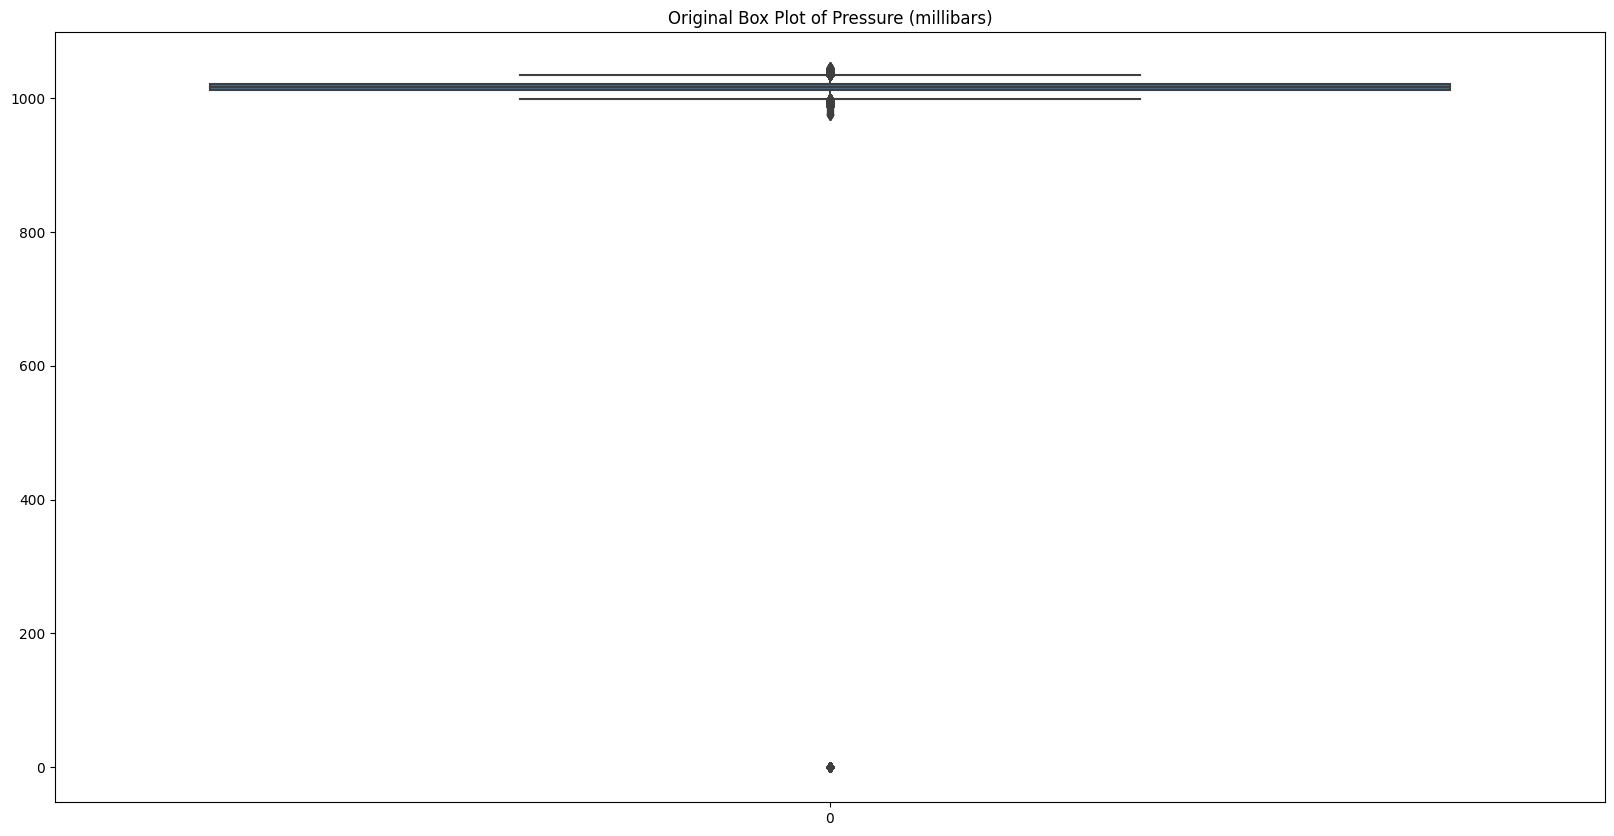

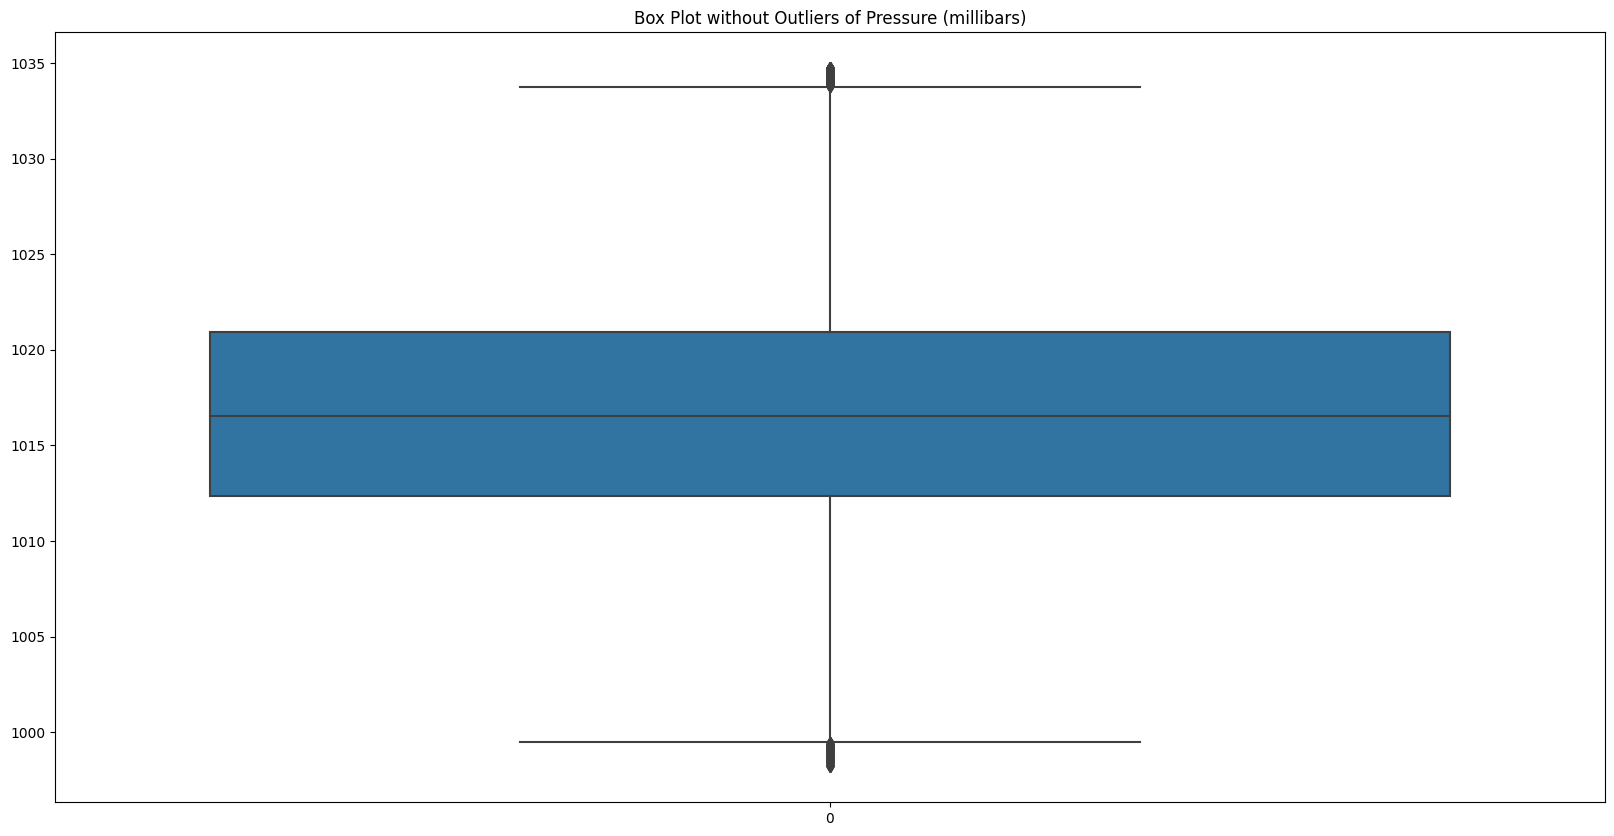

In [22]:
# columns = ["Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"]
df7 = removal_box_plot(df7, "Pressure (millibars)")

The box plot shows that there are no outliers in "Wind Bearing (degrees)" and "Visibility (km)" columns

In [23]:
# Finding the co-relation between the columns
corelation_columns = df7.select_dtypes(include="float64").columns
corelation_columns
# corelation_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
#        'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
#        'Pressure (millibars)']

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

In [24]:
corelation_columns = df7[corelation_columns]
corelation_columns.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [25]:
corr_matrix = corelation_columns.corr()
corr_matrix

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.993497,-0.646381,0.019742,0.025450,0.389797,-0.305427
Apparent Temperature (C),0.993497,1.000000,-0.618492,-0.039869,0.025797,0.381851,-0.289680
Humidity,-0.646381,-0.618492,1.000000,-0.223513,0.009774,-0.365508,0.034045
Wind Speed (km/h),0.019742,-0.039869,-0.223513,1.000000,0.080927,0.093434,-0.198490
Wind Bearing (degrees),0.025450,0.025797,0.009774,0.080927,1.000000,0.051418,-0.073591
Visibility (km),0.389797,0.381851,-0.365508,0.093434,0.051418,1.000000,-0.143466
Pressure (millibars),-0.305427,-0.289680,0.034045,-0.198490,-0.073591,-0.143466,1.000000


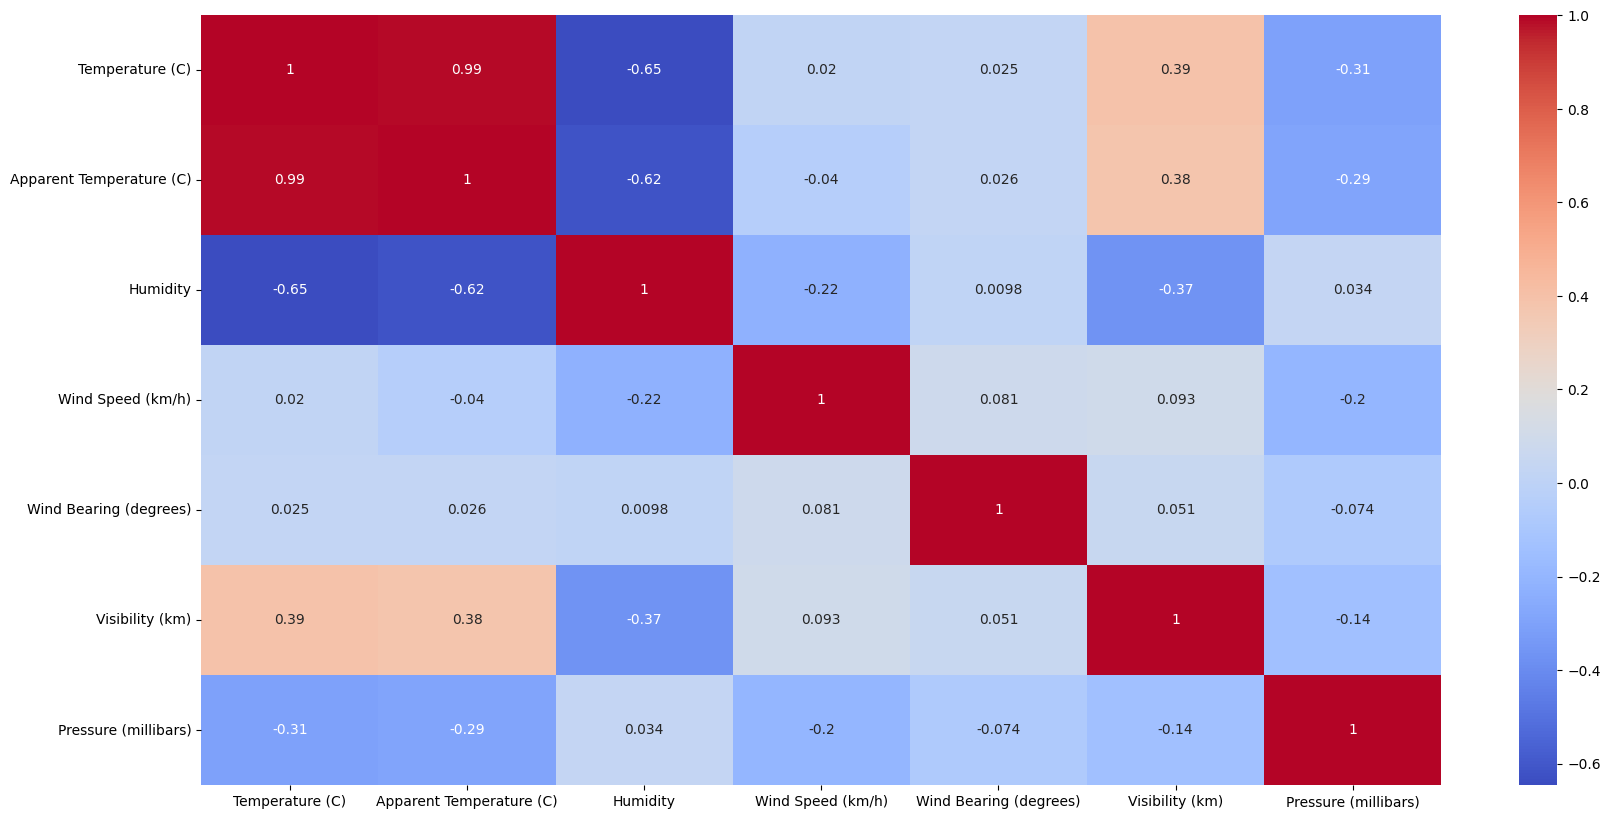

In [26]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

This shows that Temperature and Apparent Temperature are highly co-related.

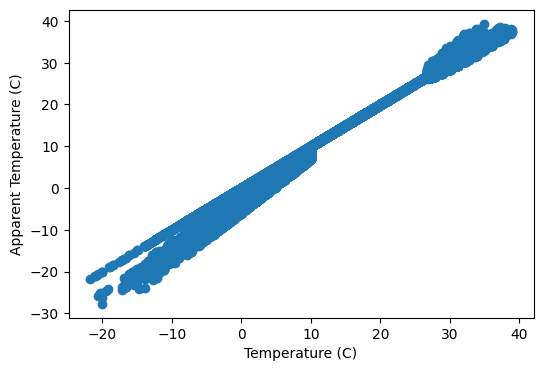

In [27]:
# Using scatter plot to check if there is any outlier in Temperature(C) and apparent Temparature(C) column
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df7['Temperature (C)'], df7['Apparent Temperature (C)'])
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Apparent Temperature (C)')
plt.show()

This shows that the data is concentrated on a point and there is no visual outlier in this. So now, after analyzing the trend, apparent temperature is safe to drop.Let's drop it.

In [28]:
df8 = df7.drop(['Apparent Temperature (C)'], axis = 1)
df8.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),time
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,"(00, 04)"
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,"(01, 04)"
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,"(02, 04)"
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,"(03, 04)"
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,"(04, 04)"


In [29]:
df8.dtypes

Summary                    object
Precip Type                object
Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)    float64
Visibility (km)           float64
Pressure (millibars)      float64
time                       object
dtype: object

In [30]:
# Time to split the time column in hour and month
df8[['hour', 'month']] = pd.DataFrame(df8['time'].tolist(), index=df8.index)
df8.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),time,hour,month
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,"(00, 04)",00,04
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,"(01, 04)",01,04
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,"(02, 04)",02,04
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,"(03, 04)",03,04
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,"(04, 04)",04,04


In [31]:
df9 = df8.drop(["time"], axis = 1)
df9.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),hour,month
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,00,04
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,01,04
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,02,04
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,03,04
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,04,04


In [32]:
df9.dtypes

Summary                    object
Precip Type                object
Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)    float64
Visibility (km)           float64
Pressure (millibars)      float64
hour                       object
month                      object
dtype: object

In [33]:
# Time to change the data types
df9["hour"] = df9["hour"].astype("int64")
df9["month"] = df9["month"].astype("int64")
df9.dtypes

Summary                    object
Precip Type                object
Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)    float64
Visibility (km)           float64
Pressure (millibars)      float64
hour                        int64
month                       int64
dtype: object

Encoding the text data columns

In [34]:
print(df9["Summary"].unique())
print(df9["Precip Type"].unique())

['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy' 'Clear'
 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Dry and Partly Cloudy' 'Dry' 'other' 'Light Rain' 'Drizzle'
 'Dry and Mostly Cloudy']
['rain' 'snow']


In [35]:
df10 = pd.get_dummies(df9, columns = ['Summary', 'Precip Type']) 
df10

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),hour,month,Summary_Clear,Summary_Drizzle,...,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Partly Cloudy,Summary_Light Rain,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_other,Precip Type_rain,Precip Type_snow
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,4,False,False,...,False,False,False,False,False,False,True,False,True,False
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,1,4,False,False,...,False,False,False,False,False,False,True,False,True,False
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2,4,False,False,...,False,False,False,False,True,False,False,False,True,False
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,3,4,False,False,...,False,False,False,False,False,False,True,False,True,False
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,4,4,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31.0,16.1000,1014.36,19,9,False,False,...,False,False,False,False,False,False,True,False,True,False
96449,24.583333,0.48,10.0947,20.0,15.5526,1015.16,20,9,False,False,...,False,False,False,False,False,False,True,False,True,False
96450,22.038889,0.56,8.9838,30.0,16.1000,1015.66,21,9,False,False,...,False,False,False,False,False,False,True,False,True,False
96451,21.522222,0.60,10.5294,20.0,16.1000,1015.95,22,9,False,False,...,False,False,False,False,False,False,True,False,True,False


In [36]:
df10.dtypes

Temperature (C)                    float64
Humidity                           float64
Wind Speed (km/h)                  float64
Wind Bearing (degrees)             float64
Visibility (km)                    float64
Pressure (millibars)               float64
hour                                 int64
month                                int64
Summary_Clear                         bool
Summary_Drizzle                       bool
Summary_Dry                           bool
Summary_Dry and Mostly Cloudy         bool
Summary_Dry and Partly Cloudy         bool
Summary_Foggy                         bool
Summary_Humid and Mostly Cloudy       bool
Summary_Humid and Partly Cloudy       bool
Summary_Light Rain                    bool
Summary_Mostly Cloudy                 bool
Summary_Overcast                      bool
Summary_Partly Cloudy                 bool
Summary_other                         bool
Precip Type_rain                      bool
Precip Type_snow                      bool
dtype: obje

In [37]:
boolean_col = df10.select_dtypes(include="bool").columns
boolean_col
for col in boolean_col:
    df10[col] = df10[col].replace({True: 1, False: 0})
df10.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_6628\1667813530.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df10[col] = df10[col].replace({True: 1, False: 0})


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),hour,month,Summary_Clear,Summary_Drizzle,...,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Partly Cloudy,Summary_Light Rain,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_other,Precip Type_rain,Precip Type_snow
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,4,0,0,...,0,0,0,0,0,0,1,0,1,0
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,1,4,0,0,...,0,0,0,0,0,0,1,0,1,0
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2,4,0,0,...,0,0,0,0,1,0,0,0,1,0
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,3,4,0,0,...,0,0,0,0,0,0,1,0,1,0
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,4,4,0,0,...,0,0,0,0,1,0,0,0,1,0


In [38]:
df10.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),hour,month,Summary_Clear,Summary_Drizzle,...,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Partly Cloudy,Summary_Light Rain,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_other,Precip Type_rain,Precip Type_snow
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,4,0,0,...,0,0,0,0,0,0,1,0,1,0
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,1,4,0,0,...,0,0,0,0,0,0,1,0,1,0
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2,4,0,0,...,0,0,0,0,1,0,0,0,1,0
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,3,4,0,0,...,0,0,0,0,0,0,1,0,1,0
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,4,4,0,0,...,0,0,0,0,1,0,0,0,1,0


# Time for applying Machine Learning Algorithms 

In [60]:
X = df10.drop('Temperature (C)', axis='columns')
y = df10['Temperature (C)']

In [61]:
# Splitting the data in training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6765509738430202

In [63]:
# Let us apply k-fold cross_validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size = 0.2)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.67763566, 0.66871756, 0.66982316, 0.67361819, 0.68207481])

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    algos= {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' :{
                'positive' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' :{
                'alpha':[1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' :{
                'criterion' : ['squared_error', 'friedman_mse'],
                'splitter' : ['best','random']
            }
        },
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size = 0.2)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores , columns=['model','best_score','best_params'])

In [65]:
find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.674470,{'positive': False}
1,lasso,0.285345,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.858793,"{'criterion': 'squared_error', 'splitter': 'be..."


In [66]:
# This shows that our decision tree model provides the best output with an accuracy of almost 89%

In [67]:
reg= DecisionTreeRegressor()
y_pred=DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [68]:
y_predicted = reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predicted)

12.793788424691915

In [69]:
from sklearn.metrics import r2_score
y_t_predicted = reg.predict(X_train)
score = r2_score(y_train, y_t_predicted)
print("The accuracy of our training model is {}%".format(round(score, 2) *100))

The accuracy of our training model is 100.0%


In [70]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predicted)
print("The accuracy of our testing  model is {}%".format(round(score, 2) *100))

The accuracy of our testing  model is 86.0%


In [71]:
# This show that our decision tree Regressor is overfitted on the data.

In [72]:
reg = DecisionTreeRegressor(min_samples_leaf=20)
y_pred=DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)

y_predicted = reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predicted)

y_t_predicted = reg.predict(X_train)
score = r2_score(y_train, y_t_predicted)
print("The accuracy of our training model is {}%".format(round(score, 2) *100))

from sklearn.metrics import r2_score
score = r2_score(y_test, y_predicted)
print("The accuracy of our testing  model is {}%".format(round(score, 2) *100))


The accuracy of our training model is 93.0%
The accuracy of our testing  model is 90.0%


After dealing with over-fitting by using the min_samples_leaf leaf parameter, we also improved the model and got 90% accuracy.

In [77]:
def predict_price(Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,hour,month,Summary,Precip_Type):
    loc_index1 = np.where(X.columns==Summary)[0][0]
    loc_index2 = np.where(X.columns==Precip_Type)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = Humidity
    x[1] = Wind_Speed
    x[2] = Wind_Bearing
    x[3] = Visibility
    x[4] = Pressure
    x[5] = hour
    x[6] = month
    if loc_index1>=0:
        x[loc_index1] = 1
    if loc_index2>=0:
        x[loc_index2] = 1
    return reg.predict([x])[0]

In [80]:
predict_price(0.89, 3.9284, 204.0, 14.9569, 1015.94, 2, 4, "Summary_Mostly Cloudy","Precip Type_rain")

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


9.656031746031744

In [ ]:
# Let us export the data to file

In [83]:
import pickle
with open('weather_prediction.pickle', 'wb') as f:
    pickle.dump(model, f)

In [84]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))